In [1]:
import re
import unicodedata
import pandas as pd
import nltk
import prepare
import acquire

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from env import user, password, host

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'
from wordcloud import WordCloud

url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/samkeeler/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samkeeler/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [3]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [4]:
top_20_spam_bigrams = (pd.Series(nltk.ngrams(spam_words, 2))
                      .value_counts()
                      .head(20))

top_20_spam_bigrams.head()

(please, call)         44
(customer, service)    27
(po, box)              24
(guaranteed, call)     23
(a1000, cash)          23
dtype: int64

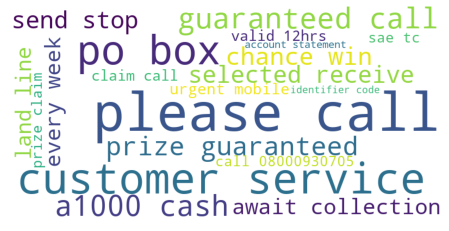

In [5]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

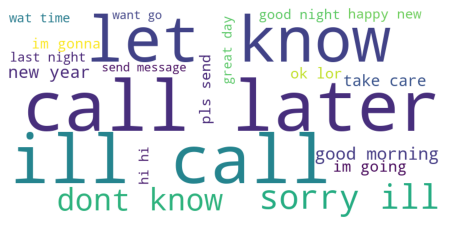

In [6]:
top_20_ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2))
                      .value_counts()
                      .head(20))
data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

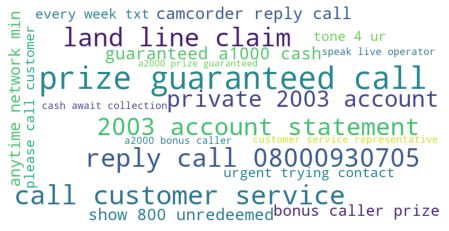

In [7]:
top_20_spam_trigrams = (pd.Series(nltk.ngrams(spam_words, 3))
                      .value_counts()
                      .head(20))
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_spam_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

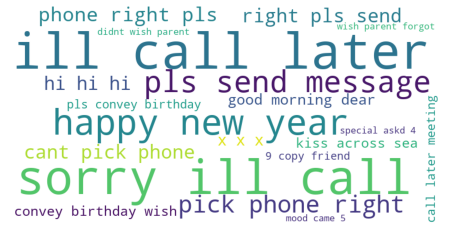

In [8]:
top_20_ham_trigrams = (pd.Series(nltk.ngrams(ham_words, 3))
                      .value_counts()
                      .head(20))
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_ham_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [10]:
blogs = acquire.acquire_all_blogs()
blogs

,title,date,content
0,Codeup’s Data Science Career Accelerator is He...,"September 30, 2018",The rumors are true! The time has arrived. Cod...
1,Data Science Myths - Codeup,"October 31, 2018",By Dimitri Antoniou and Maggie Giust\nData Sci...
2,Data Science VS Data Analytics: What’s The Dif...,"October 17, 2018","By Dimitri Antoniou\nA week ago, Codeup launch..."
3,10 Tips to Crush It at the SA Tech Job Fair - ...,"August 14, 2018",SA Tech Job Fair\nThe third bi-annual San Anto...
4,Competitor Bootcamps Are Closing. Is the Model...,"August 14, 2018",Competitor Bootcamps Are Closing. Is the Model...


In [13]:
blogs = prepare.make_prepped_columns(blogs)
blogs.drop(columns = ['lemmatized', 'clean', 'original'], inplace = True)

In [14]:
blogs

,title,date,stemmed
0,Codeup’s Data Science Career Accelerator is He...,"September 30, 2018",the rumor are true the time ha arriv codeup ha...
1,Data Science Myths - Codeup,"October 31, 2018",by dimitri antoni and maggi giustdata scienc b...
2,Data Science VS Data Analytics: What’s The Dif...,"October 17, 2018",by dimitri antonioua week ago codeup launch ou...
3,10 Tips to Crush It at the SA Tech Job Fair - ...,"August 14, 2018",sa tech job fairth third biannual san antonio ...
4,Competitor Bootcamps Are Closing. Is the Model...,"August 14, 2018",competitor bootcamp are close is the model in ...


In [19]:
blogs.stemmed.tolist()[0]

'the rumor are true the time ha arriv codeup ha offici open applic to our new data scienc career acceler with onli 25 seat avail thi immers program is one of a kind in san antonio and will help you land a job in glassdoor 1 best job in americadata scienc is a method of provid action intellig from data the data revolut ha hit san antonio result in an explos in data scientist posit across compani like usaa accentur booz allen hamilton and heb weve even seen utsa invest 70 m for a cybersecur center and school of data scienc we built a program to specif meet the grow demand of thi industryour program will be 18 week long fulltim handson and projectbas our curriculum develop and instruct is led by senior data scientist maggi giust who ha work at heb capit group and rackspac along with input from dozen of practition and hire partner student will work with real data set realist problem and the entir data scienc pipelin from collect to deploy they will receiv profession develop train in resum 

In [21]:
blog_words = ' '.join(blogs['stemmed'])

In [23]:
blog_words.split(' ')

['the',
 'rumor',
 'are',
 'true',
 'the',
 'time',
 'ha',
 'arriv',
 'codeup',
 'ha',
 'offici',
 'open',
 'applic',
 'to',
 'our',
 'new',
 'data',
 'scienc',
 'career',
 'acceler',
 'with',
 'onli',
 '25',
 'seat',
 'avail',
 'thi',
 'immers',
 'program',
 'is',
 'one',
 'of',
 'a',
 'kind',
 'in',
 'san',
 'antonio',
 'and',
 'will',
 'help',
 'you',
 'land',
 'a',
 'job',
 'in',
 'glassdoor',
 '1',
 'best',
 'job',
 'in',
 'americadata',
 'scienc',
 'is',
 'a',
 'method',
 'of',
 'provid',
 'action',
 'intellig',
 'from',
 'data',
 'the',
 'data',
 'revolut',
 'ha',
 'hit',
 'san',
 'antonio',
 'result',
 'in',
 'an',
 'explos',
 'in',
 'data',
 'scientist',
 'posit',
 'across',
 'compani',
 'like',
 'usaa',
 'accentur',
 'booz',
 'allen',
 'hamilton',
 'and',
 'heb',
 'weve',
 'even',
 'seen',
 'utsa',
 'invest',
 '70',
 'm',
 'for',
 'a',
 'cybersecur',
 'center',
 'and',
 'school',
 'of',
 'data',
 'scienc',
 'we',
 'built',
 'a',
 'program',
 'to',
 'specif',
 'meet',
 'the',


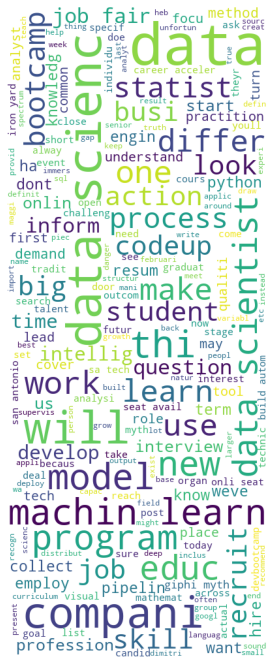

In [26]:
img = WordCloud(background_color='white', height=1000, width=400).generate(blog_words)
plt.figure(figsize=(6, 12))
plt.imshow(img)
plt.axis('off')
plt.show()

In [28]:
blog_freq = pd.Series(blog_words).value_counts()

In [29]:
blog_freq

the rumor are true the time ha arriv codeup ha offici open applic to our new data scienc career acceler with onli 25 seat avail thi immers program is one of a kind in san antonio and will help you land a job in glassdoor 1 best job in americadata scienc is a method of provid action intellig from data the data revolut ha hit san antonio result in an explos in data scientist posit across compani like usaa accentur booz allen hamilton and heb weve even seen utsa invest 70 m for a cybersecur center and school of data scienc we built a program to specif meet the grow demand of thi industryour program will be 18 week long fulltim handson and projectbas our curriculum develop and instruct is led by senior data scientist maggi giust who ha work at heb capit group and rackspac along with input from dozen of practition and hire partner student will work with real data set realist problem and the entir data scienc pipelin from collect to deploy they will receiv profession develop train in resum w

In [35]:
blog_words = prepare.remove_stopwords(blog_words)
pd.Series(blog_words.split(' ')).value_counts()

data       69
scienc     25
learn      22
compani    19
job        14
           ..
18          1
mini        1
prefer      1
advic       1
snap        1
Length: 766, dtype: int64

In [36]:
articles = acquire.get_articles('science')

In [40]:
articles = pd.DataFrame(articles)

In [41]:
articles = prepare.make_prepped_columns(articles)
articles.drop(columns = ['lemmatized', 'clean', 'original'], inplace = True)

In [42]:
articles

,title,category,stemmed
0,1st molecular images of B.1.1.7 COVID-19 mutat...,science,canada ' s univers of british columbia researc...
1,There's no unique Andhra COVID-19 strain which...,science,the centr for cellular and molecular biolog cc...
2,"What is Sputnik Light, single-dose COVID-19 va...",science,russia authoris a singledos version of sputnik...
3,SpaceX Starship lands without exploding in 5th...,science,spacex on wednesday pull off a safe land of it...
4,Jeff Bezos' Blue Origin to sell tickets for sp...,science,jeff bezo ' space compani blue origin will soo...
5,SpaceX returns 4 astronauts in rare night spla...,science,elon muskl spacex safe return four astronaut f...
6,Why did SpaceX Crew-1 astronauts land in the d...,science,elon muskl spacex safe return with four astron...
7,"Chinese rocket debris travelling at 29,000 kmp...",science,debri from the chines long march 5b rocket is ...
8,New type of pumpkin toadlet with glowing bones...,science,a team of scientist ha discov a new type of pu...
9,World's first pregnant Egyptian mummy discover...,science,xray and comput test have reveal that an egypt...


In [44]:
articles.stemmed.tolist()

["canada ' s univers of british columbia research are the first to publish structur imag of n501i mutat on sarscov2 spike protein a chang believ to be partli respons for the infecti natur and spread of variant b117 our analysi revealedeven though n501i mutant canent our cell more readili it can still be neutralis by antibodi a research said",
 'the centr for cellular and molecular biolog ccmb ha said there is no uniqu andhra covid19 strain which is 15 time more virul neither were ani exist strain found to be more infecti than what we alreadi saw befor it ad the ccmb further said that the n440k variant in andhra is like to be replac by anoth variant',
 "russia authoris a singledos version of sputnik v coronaviru vaccin call ' sputnik light ' which demonstr 794 efficaci compar to 916 for the twoshot sputnik v sputnik light ha proven effect against all new strain of coronaviru russia said the sputnik light claim to have develop virusneutralis antibodi in 9167 of volunt on the 28thday post

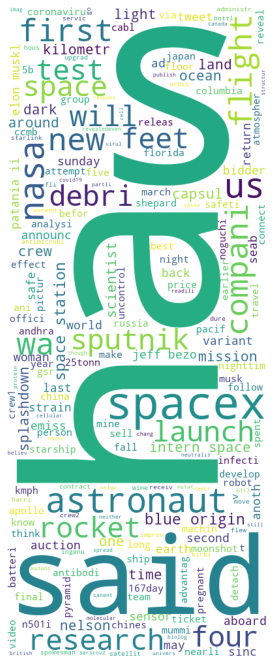

In [46]:
img = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(articles['stemmed']))
plt.figure(figsize=(6, 12))
plt.imshow(img)
plt.axis('off')
plt.show()